In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
# import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tools import *
import operator
import itertools

In [3]:
torch.cuda.is_available()
torch.cuda.current_device()

0

In [4]:
train_data=torchvision.datasets.MNIST('./', train=True, download=True,transform=torchvision.transforms.ToTensor())
test_data=torchvision.datasets.MNIST('./', train=False, download=True,transform=torchvision.transforms.ToTensor())
# train_loader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)

In [5]:
train_data_list=[]
train_label_list=[]
for x,y in train_data:
    train_data_list.append(x)
    train_label_list.append(y)
    
test_data_list=[]
test_label_list=[]
for x,y in test_data:
    test_data_list.append(x)
    test_label_list.append(y)
    
train_data_tensor=torch.stack(train_data_list)
train_label_tensor=torch.tensor(train_label_list)
test_data_tensor=torch.stack(test_data_list)
test_label_tensor=torch.tensor(test_label_list)

print(train_data_tensor.size())
print(train_label_tensor.size())
print(test_data_tensor.size())
print(test_label_tensor.size())

torch.Size([60000, 1, 28, 28])
torch.Size([60000])
torch.Size([10000, 1, 28, 28])
torch.Size([10000])


In [6]:
class Net(nn.Module):
    def __init__(self,feature_dim):
        super(Net, self).__init__()
        self.feature_dim=feature_dim        
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 100)
        self.fc2 = nn.Linear(100, feature_dim)
        self.fc3 = nn.Linear(feature_dim,10)
        
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)

    def forward(self, x):
        x=x.view(-1,1,28,28)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x =torch.tanh(self.fc2(x))
        x= self.fc3(x)
        return F.log_softmax(x,dim=-1)
        
    def predictive_distribution_entropy(self,x):
        with torch.no_grad():
            batch_logit=self.forward(x)
            batch_probs=torch.exp(batch_logit)
            batch_entropy=-torch.sum(batch_logit*batch_probs,dim=-1)
#             print(batch_entropy.size())
        return batch_entropy

        
    
    def train(self,x,label):
        train_losses = []
        if x.size(0)<100:
            batch_size=x.size(0)
            iteration=1
        else:
            batch_size=100
            iteration=int(x.size(0)/batch_size)
        batch_size=100
        for epoch in range(0,1000):
#             if epoch%100==0:
#                 print('learning_epoch:',epoch)
            for it in range(0,iteration):
                index=np.random.choice(x.size(0),batch_size)
                self.optimizer.zero_grad()
                output = self.forward(x[index])
                nll_loss= F.nll_loss(output,label[index],reduction='sum')
                nll_loss.backward()
                self.optimizer.step()
                train_losses.append(nll_loss.item())
#         plt.title('training_accuracy')
#         plt.plot(train_losses)
#         plt.show()
        return train_losses
    
    def test(self,x,label):
        pred = (self.forward(x).data.max(dim=1, keepdim=True)[1]).view(-1)
#         print(pred)
#         print(label)
#         print(torch.nonzero(pred-label))
        accuracy=(pred == label).sum().item()/label.size(0)
        return accuracy
    
        
#     def test(self):
#         correct=0
#         for data, target in test_loader:
#             pred = self.predict(data)
#             correct += pred.eq(target.data.view_as(pred)).sum()
#             correct_ratio= float(correct)/len(test_loader.dataset)
#         return correct_ratio
    

big_epoch: 0 start training...
train_data_size 10
epoch: 0 test_accuracy 0.4085
big_epoch: 1 start training...
train_data_size 20
epoch: 1 test_accuracy 0.4948
big_epoch: 2 start training...
train_data_size 30
epoch: 2 test_accuracy 0.6042
big_epoch: 3 start training...
train_data_size 40
epoch: 3 test_accuracy 0.6745
big_epoch: 4 start training...
train_data_size 50
epoch: 4 test_accuracy 0.7165
big_epoch: 5 start training...
train_data_size 60
epoch: 5 test_accuracy 0.7289
big_epoch: 6 start training...
train_data_size 70
epoch: 6 test_accuracy 0.7411
big_epoch: 7 start training...
train_data_size 80
epoch: 7 test_accuracy 0.7988
big_epoch: 8 start training...
train_data_size 90
epoch: 8 test_accuracy 0.817
big_epoch: 9 start training...
train_data_size 100
epoch: 9 test_accuracy 0.8099
big_epoch: 10 start training...
train_data_size 110
epoch: 10 test_accuracy 0.8402
big_epoch: 11 start training...
train_data_size 120
epoch: 11 test_accuracy 0.8379
big_epoch: 12 start training...
tr

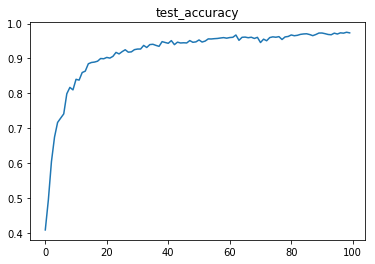

[0.4085, 0.4948, 0.6042, 0.6745, 0.7165, 0.7289, 0.7411, 0.7988, 0.817, 0.8099, 0.8402, 0.8379, 0.8596, 0.8636, 0.8847, 0.8884, 0.8896, 0.8921, 0.8998, 0.8991, 0.9029, 0.901, 0.906, 0.9173, 0.913, 0.9195, 0.9249, 0.918, 0.9189, 0.9252, 0.9269, 0.927, 0.9374, 0.9314, 0.9397, 0.9406, 0.9374, 0.9347, 0.9482, 0.9457, 0.9434, 0.9511, 0.9396, 0.9467, 0.9443, 0.9449, 0.9444, 0.9512, 0.9463, 0.9475, 0.953, 0.947, 0.9498, 0.956, 0.9558, 0.9567, 0.9573, 0.9586, 0.9597, 0.9581, 0.9599, 0.9606, 0.9672, 0.952, 0.9606, 0.9612, 0.9594, 0.9608, 0.9573, 0.9605, 0.9456, 0.9553, 0.9507, 0.9598, 0.9619, 0.9608, 0.9625, 0.9543, 0.9617, 0.963, 0.9673, 0.9651, 0.9663, 0.969, 0.9702, 0.9707, 0.9685, 0.9653, 0.9686, 0.9728, 0.9729, 0.971, 0.9687, 0.9679, 0.9725, 0.97, 0.9734, 0.9725, 0.9751, 0.9733]


In [7]:
nn_tanh = Net(feature_dim=20).cuda()
init_train_data=train_data_tensor[0:10].cuda()
init_train_label=train_label_tensor[0:10].cuda()
accuracy_list=[]
for epoch in range(0,100):
    print('big_epoch:', epoch, 'start training...')
    print('train_data_size',init_train_label.size(0))
    nn_tanh.train(init_train_data,init_train_label)
    
    accuracy=nn_tanh.test(test_data_tensor.cuda(),test_label_tensor.cuda())
    accuracy_list.append(accuracy)
    print('epoch:', epoch, 'test_accuracy', accuracy)
#     plt.title('test_accuracy')
#     plt.plot(accuracy_list)
#     plt.show()
#     accuracy_list.append(accuracy)
    ### active part
#     print('epoch:', epoch, 'start active learning...')
    for i in range(0,10):
        active_batch_data=train_data_tensor[i*6000:(i+1)*6000].cuda()
        entropy_list=nn_tanh.predictive_distribution_entropy(active_batch_data)
        _, index = entropy_list.max(0)
        init_train_data=torch.cat((init_train_data,active_batch_data[index].view(1,1,28,28).cuda()),0)
        init_train_label=torch.cat((init_train_label,train_label_tensor[index+i*6000].view(-1).cuda()),0)
        
plt.title('test_accuracy')
plt.plot(accuracy_list)
plt.show()
print(accuracy_list)